In [306]:
#se importan las librerias
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tkinter as tk

um=1e-6
mm=1e-3
nm=1e-9
cm=1e-2

In [318]:
#Lectura de la imagen
Gala = cv2.imread('gala-desnuda-mirando.jpg',0)

In [320]:
#Función que representa la vista de una imagen a diferentes distancia inorando el escalado de imagen
def Vistaojohumano(Gala,z1,Wl):
    #Distancia axial entre el cristalino y la retina del ojo humano promedio
    z2 =23*mm
    #Radio promedio la pupila del ojo humano en buenas condiciones de iluminación
    #Debido a un cambio de las dimensiones del espectro de frecuencias de la función pupila se considera un cambio
        # en las dimensiones espaciales de la pupila debido a la distancia del plano objeto
    radio = int(((2*mm/(z1*Wl))))
    mask=np.zeros(np.shape(Gala))
    M,N = np.shape(Gala)

    Mag =  -z2 / z1
    cv2.circle(mask,(int(N/2),int(M/2)),radio,1,-1)

    #Función de respeusta al impulso de la lente considerando un sistema formador de imagenes
    Hi = (1/((Wl**2)*(z1*z2)))*np.fft.fft2(mask)
    Hi2 = (1/np.abs(Mag))*Hi

    U_g=(1/np.abs(Mag))*Gala

    ConA = np.fft.fftshift(np.fft.fft2(Hi2))
    ConB = (np.fft.fft2(U_g))
    #Convolución 
    Con = np.fft.ifftshift(np.fft.ifft2(np.abs(ConA)*ConB))

    return np.abs(np.fft.ifftshift(Con))**2


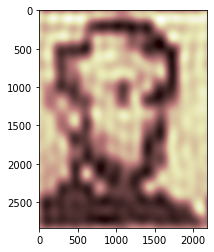

In [317]:
Wl = 633*nm
Distancia = 250
plt.imshow(Vistaojohumano(Gala,Distancia,Wl),cmap="pink")

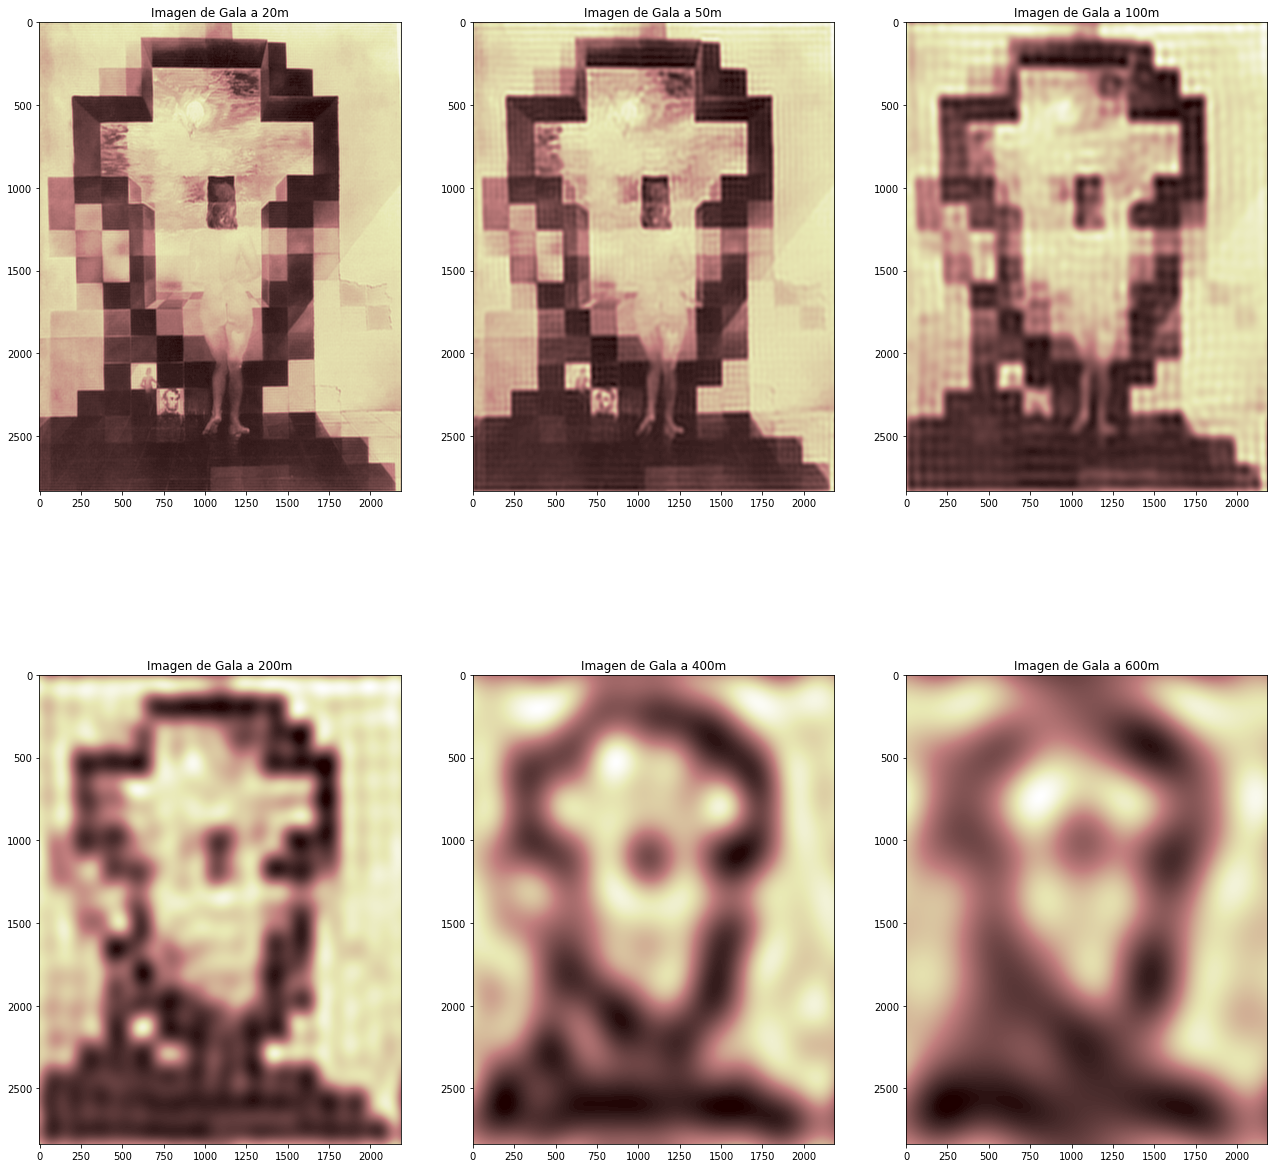

In [316]:
#Diferentes vistas de la imagen de gala a diferentes distancia bajo un luz monocromatica de 633nm
Wl = 633*nm

fig, ax = plt.subplots(2,3,figsize=(22, 22))
ax[0][0].imshow(Vistaojohumano(Gala,20,Wl),cmap="pink")
ax[0][0].set_title("Imagen de Gala a 20m")
ax[0][1].imshow(Vistaojohumano(Gala,50,Wl),cmap="pink")
ax[0][1].set_title("Imagen de Gala a 50m")
ax[0][2].imshow(Vistaojohumano(Gala,100,Wl),cmap="pink")
ax[0][2].set_title("Imagen de Gala a 100m")
ax[1][0].imshow(Vistaojohumano(Gala,200,Wl),cmap="pink")
ax[1][0].set_title("Imagen de Gala a 200m")
ax[1][1].imshow(Vistaojohumano(Gala,400,Wl),cmap="pink")
ax[1][1].set_title("Imagen de Gala a 400m")
ax[1][2].imshow(Vistaojohumano(Gala,600,Wl),cmap="pink")
ax[1][2].set_title("Imagen de Gala a 600m")
plt.show()